In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [7]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Harris_No_Filter.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-7-aaf7616243a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-7-aaf7616243a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,8702895.0,7822125.0,7977165.0,8336715.0,7543665.0,7204770.0,7019640.0,6174570.0,6573900.0,6584355.0,...,4850865.0,5131110.0,4438530.0,5480205.0,8476455.0,5380755.0,4319955.0,4103205.0,4357695.0,1
1,9272055.0,9612990.0,8949480.0,8290560.0,8668470.0,8069475.0,7088490.0,7715025.0,8439990.0,8129910.0,...,8204625.0,9601770.0,8300250.0,8825805.0,8180145.0,7635975.0,8716155.0,6454815.0,6523665.0,1
2,12299925.0,10031955.0,9532410.0,11581335.0,11438280.0,7724715.0,7944780.0,11011155.0,9040005.0,9620130.0,...,4928640.0,6581295.0,10021245.0,10227285.0,12263715.0,9085395.0,4619580.0,5410335.0,10280070.0,1
3,7505670.0,4026705.0,2764710.0,3217845.0,6535650.0,8089110.0,7637250.0,7196355.0,6361230.0,5555685.0,...,4403340.0,4432410.0,4456125.0,5669160.0,6325530.0,4359990.0,4788900.0,5636265.0,5230050.0,1
4,7991955.0,5726280.0,2689995.0,3049545.0,6869955.0,7474050.0,7209105.0,6322980.0,5264475.0,4516560.0,...,3757170.0,3598050.0,4082040.0,6345420.0,7001535.0,5038290.0,4502535.0,3825000.0,3552150.0,1


In [8]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [9]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7302631578947368
              precision    recall  f1-score   support

          -1       0.84      0.82      0.83       123
           1       0.31      0.34      0.33        29

    accuracy                           0.73       152
   macro avg       0.58      0.58      0.58       152
weighted avg       0.74      0.73      0.74       152



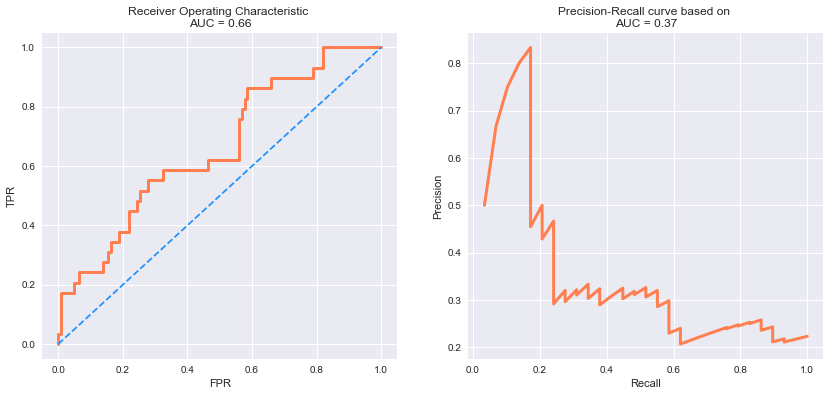

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()